<a href="https://colab.research.google.com/github/OmarMohammed88/BCDU-Net/blob/master/Vgg_16_bn_tumor_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://drive.google.com/drive/folders/17NOhXdm6_P-HpNgUjHG55o7AOPU89QzJ?usp=sharing

In [11]:
!gdown https://drive.google.com/uc?id= 17NOhXdm6_P-HpNgUjHG55o7AOPU89QzJ

Permission denied: https://drive.google.com/uc?id=17NOhXdm6_P-HpNgUjHG55o7AOPU89QzJ
Maybe you need to change permission over 'Anyone with the link'?


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
!unzip '/content/test-20201107T135931Z-001.zip'

Archive:  /content/test-20201107T135931Z-001.zip
  inflating: test/R01-146_70.png     
  inflating: test/R01-146_42.png     
  inflating: test/R01-146_99.png     
  inflating: test/R01-146_17.png     
  inflating: test/R01-146_101.png    
  inflating: test/R01-146_61.png     
  inflating: test/R01-146_3.png      
  inflating: test/R01-146_19.png     
  inflating: test/R01-146_71.png     
  inflating: test/R01-146_35.png     
  inflating: test/R01-146_33.png     
  inflating: test/R01-146_32.png     
  inflating: test/R01-146_31.png     
  inflating: test/R01-146_21.png     
  inflating: test/R01-146_11.png     
  inflating: test/R01-146_94.png     
  inflating: test/R01-146_89.png     
  inflating: test/R01-146_44.png     
  inflating: test/R01-146_73.png     
  inflating: test/R01-146_87.png     
  inflating: test/R01-146_65.png     
  inflating: test/R01-146_85.png     
  inflating: test/R01-146_50.png     
  inflating: test/R01-146_26.png     
  inflating: test/R01-146_49.png     
 

In [21]:
x = os.listdir('/content/test')
len(x)

3151

In [22]:
from imutils import paths
from PIL import Image as im 
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
import argparse

import cv2
import os
import shutil
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from torch.utils.data import Dataset, DataLoader
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


In [23]:
!pip install -q --upgrade fastcore 
!pip install -q --upgrade fastai # Make sure we have the latest fastai

     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 194kB 5.1MB/s 


In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image as PImage # TO avoid confusion later
from fastai.vision.all import *
from fastai.vision import *


In [ ]:
def crop_tumor(patient):
    
    Z, Y, X = [111, 119, 149] # Max tumor shape
    
    img = patient['img']
    mask = patient['mask']
    
    z_values, y_values, x_values = np.where(mask==1)
    
    z_tumor_begining = np.min(z_values)
    y_tumor_begining = np.min(y_values)
    x_tumor_begining = np.min(x_values)
    
    z_tumor_end = z_tumor_begining + int(Z)
    y_tumor_end = y_tumor_begining + int(Y)
    x_tumor_end = x_tumor_begining + int(X)
    
    img = img[z_tumor_begining : z_tumor_end,
              y_tumor_begining : y_tumor_end,
              x_tumor_begining : x_tumor_end]
    
    mask = mask[z_tumor_begining : z_tumor_end,
                y_tumor_begining : y_tumor_end,
                x_tumor_begining : x_tumor_end]
    
    if img.shape < (Z,Y,X):
        img  = np.pad(img,  ((0,Z- img.shape[0]),(0,Y- img.shape[1]), (0,X- img.shape[2])),'constant')
        mask = np.pad(mask, ((0,Z-mask.shape[0]),(0,Y-mask.shape[1]), (0,X-mask.shape[2])),'constant')
    
    tumor = img*mask                                                 ###Tune###
#     tumor = img
    tumor = tumor.astype('float32')
    return tumor

################################################################################

def crop_exact_tumor(patient, mode = 1):
    msk_list=[]
    img = patient['img']
    mask = patient['mask']
    
    z_values, y_values, x_values = np.where(mask==1)
    
    z_tumor_begining = np.min(z_values)
    y_tumor_begining = np.min(y_values)
    x_tumor_begining = np.min(x_values)
    
    z_tumor_end = np.max(z_values) + 1
    y_tumor_end = np.max(y_values) + 10
    x_tumor_end = np.max(x_values) + 10
    
    img = img[z_tumor_begining : z_tumor_end,
              y_tumor_begining : y_tumor_end,
              x_tumor_begining : x_tumor_end]



    mask = mask[z_tumor_begining : z_tumor_end,
                y_tumor_begining : y_tumor_end,
                x_tumor_begining : x_tumor_end]
      
    
    if mode:
       tumor = img
    else:
       tumor = mask * img
    tumor = tumor.astype('float32')
    return tumor
    
################################################################################

def get_tumor_volume(patient):
    volume = 0
    
    mask = patient['mask']
    tags = patient['tags']
    
    SliceThickness = float(tags['SliceThickness'])
    
    PixelSpacing = tags['PixelSpacing']
    PixelSpacing = PixelSpacing.split()
    PixelSpacing = float(PixelSpacing[0][2:-3])
    
    VoxelSize = PixelSpacing*PixelSpacing*SliceThickness
    no_of_voxels = np.count_nonzero(mask)
    
    return (VoxelSize*no_of_voxels)

################################################################################

def get_tumor_surface_area (patient):
    area = 0
        
    mask = patient['mask']
    tags = patient['tags']
    
    SliceThickness = float(tags['SliceThickness'])
    PixelSpacing = tags['PixelSpacing']
    PixelSpacing = PixelSpacing.split()
    PixelSpacing = float(PixelSpacing[0][2:-3])
    
    #tumor = crop_exact_tumor(patient, 0)
    tumor = mask
    
    last_tumor_slice = np.max(np.where(tumor>0)[0])
    
    for i in range(last_tumor_slice):
        img = tumor[i].copy()
        img[img!=0]=255
        contours, _ = cv2.findContours(img.astype('uint8'), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        perimeter = 0
        for cnt in contours:
            perimeter += cv2.arcLength(cnt, True)
            
        if i == 0 or i == last_tumor_slice:
            tumor_pixels_count = np.count_nonzero(img)
            area += tumor_pixels_count * (PixelSpacing**2)
            area += perimeter * 0.5*SliceThickness
        else:
            area += perimeter * SliceThickness
            
    return area

##load Data

In [ ]:
files_names=os.listdir("/content/drive/My Drive/GOS")

In [ ]:
!sudo apt install unrar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.5.8-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
import os 
for i in files_names:
  command="unrar e -r /content/drive/'My Drive'/GOS/"+i+" /content/drive/'My Drive'/pickles/"
  os.system(command)


In [ ]:
!rm -r /content/test

In [ ]:
def pickle_to_img(path):
    file_names = os.listdir(path)
    for i in file_names:
        file = open(path + '/' + i ,'rb')
        data=pickle.load(file)
        file.close()
        img = data['img']
        img = crop_exact_tumor(data,mode = 0)
        for j in range(3,img.shape[0]-4):
          cv2.imwrite("/content/test/"+i.split(".pickle")[0]+'_'+str(j)+ '.png',img[j]) 


In [ ]:
pickle_to_img('/content/drive/My Drive/pickles')

In [ ]:
x

[('R01-001_3.png', 0    0
  Name: label, dtype: int64)]

In [25]:
clinc_csv = pd.read_csv('/content/clinical.csv')

In [39]:
clinical_data = pd.read_csv('clinical.csv')
clinical_data = clinical_data.loc[clinical_data['Case ID']>='R01-001'] #Dropping AMC patients
clinical_data = clinical_data.loc[clinical_data['Case ID']<='R01-146'] #Dropping the rest of R01 patients (with no CT)

clinical_data = clinical_data[['Case ID', 'Pathological T stage',
                               'Pathological N stage', 'Pathological M stage']] #Dropping all irrelavant info

clinical_data.rename(columns = {'Case ID': 'ID',
                                'Pathological T stage': 'T',
                               'Pathological N stage' : 'N',
                               'Pathological M stage' : 'M'}, inplace = True)

# Dropping two patients who had no CT:
clinical_data = clinical_data[clinical_data.ID != 'R01-009']
clinical_data = clinical_data[clinical_data.ID != 'R01-143']

clinical_data['label'] = 0
clinical_data.loc[clinical_data.M != 'M0', 'label'] = 2
clinical_data.loc[(clinical_data.M != 'M0') | (clinical_data.N != 'N0'), 'label'] = 1

label0_count = clinical_data[(clinical_data.label == 0)].count()[0]
label1_count = clinical_data[(clinical_data.label == 1)].count()[0]
label2_count = clinical_data[(clinical_data.label == 2)].count()[0]
print('Class 0 count = %d patients. \nClass 1 count = %d patients. \nClass 2 count = %d patients'%
      (label0_count, label1_count, label2_count))
clinical_data.head(10)

Class 0 count = 112 patients. 
Class 1 count = 32 patients. 
Class 2 count = 0 patients


,ID,T,N,M,label
49,R01-001,T1a,N0,M0,0
50,R01-002,T1a,N0,M0,0
51,R01-003,T3,N0,M0,0
52,R01-004,T1b,N2,M0,1
53,R01-005,T2a,N0,M0,0
54,R01-006,T1b,N0,M0,0
55,R01-007,T1a,N1,M0,1
56,R01-008,Tis,N0,M0,0
58,R01-010,T3,N0,M0,0
59,R01-011,T1a,N2,M0,1


In [ ]:
"R01-001_10.png"

'R01-001.png'

In [40]:
clinical_data.to_csv('clinical_data.csv')

In [41]:
clinical_data = pd.read_csv('/content/clinical_data.csv')

In [42]:
img_data = os.listdir('/content/test')

In [43]:
len(img_data)

3151

In [44]:
clinical_data

,Unnamed: 0,ID,T,N,M,label
0,49,R01-001,T1a,N0,M0,0
1,50,R01-002,T1a,N0,M0,0
2,51,R01-003,T3,N0,M0,0
3,52,R01-004,T1b,N2,M0,1
4,53,R01-005,T2a,N0,M0,0
...,...,...,...,...,...,...
139,189,R01-141,T1b,N0,M0,0
140,190,R01-142,T1b,N0,M0,0
141,192,R01-144,T1a,N0,M0,0
142,193,R01-145,T2a,N0,M0,0


In [45]:
images_label_1 = []
images_label_0 = []
for i in range(len(img_data)):
  if img_data[i].split("_")[0] in clinical_data['ID'].tolist():
    if clinical_data[clinical_data['ID'] == img_data[i].split("_")[0]]['label'].values == 0:
      images_label_0.append(img_data[i])
    
    if clinical_data[clinical_data['ID'] == img_data[i].split("_")[0]]['label'].values == 1:
      images_label_1.append(img_data[i])  
    
    




In [46]:
df_class_0 = pd.DataFrame()
df_class_0['name'] = ""
df_class_0['label'] = ""

df_class_1 = pd.DataFrame()
df_class_1['name'] = ""
df_class_1['label'] = ""

df_class_0['name'] = images_label_0
df_class_0['label'] = 0

df_class_1['name'] = images_label_1
df_class_1['label'] = 1

In [47]:
frames=[df_class_0,df_class_1]
df=pd.concat(frames)
df

,name,label
0,R01-008_14.png,0
1,R01-137_28.png,0
2,R01-112_46.png,0
3,R01-129_14.png,0
4,R01-032_62.png,0
...,...,...
1089,R01-054_24.png,1
1090,R01-119_16.png,1
1091,R01-146_58.png,1
1092,R01-029_28.png,1


## Model

In [48]:
!cp /content/test/* /content/images

cp: target '/content/images' is not a directory


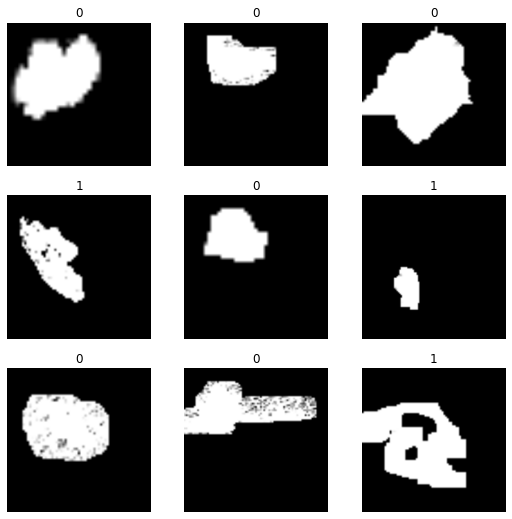

In [49]:
dls = ImageDataLoaders.from_df(df, path='test/', suff='', label_col='label', item_tfms=Resize(224))
dls.show_batch()

In [53]:
recall = Recall()
presc = Precision()

In [58]:
learn = cnn_learner(dls, vgg16_bn, metrics=[accuracy,error_rate,recall,presc],callback_fns=[WandbCallback])

In [59]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,error_rate,recall_score,precision_score,time
0,0.954363,0.465545,0.803175,0.196825,0.550459,0.821918,00:34


epoch,train_loss,valid_loss,accuracy,error_rate,recall_score,precision_score,time
0,0.592683,0.384968,0.844444,0.155556,0.766055,0.780374,00:46
1,0.478025,0.353531,0.855556,0.144444,0.802752,0.784753,00:45
2,0.373314,0.353317,0.858730,0.141270,0.862385,0.761134,00:46
3,0.301637,0.303439,0.884127,0.115873,0.876147,0.805907,00:46
4,0.228659,0.311891,0.884127,0.115873,0.848624,0.822222,00:46
5,0.178496,0.333569,0.890476,0.109524,0.770642,0.898396,00:46
6,0.123719,0.229774,0.919048,0.080952,0.839450,0.919598,00:46
7,0.094919,0.257563,0.912698,0.087302,0.839450,0.901478,00:46
8,0.071147,0.215151,0.930159,0.069841,0.866972,0.926471,00:45
9,0.056810,0.214950,0.925397,0.074603,0.866972,0.913043,00:46


SuggestedLRs(lr_min=1.9054607491852948e-07, lr_steep=1.3182567499825382e-06)

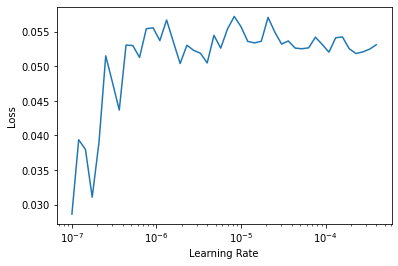

In [60]:
learn.lr_find()

In [61]:
learn.fine_tune(10,base_lr = 1.9054607491852948e-07)

epoch,train_loss,valid_loss,accuracy,error_rate,recall_score,precision_score,time
0,0.045909,0.216540,0.926984,0.073016,0.866972,0.917476,00:35


epoch,train_loss,valid_loss,accuracy,error_rate,recall_score,precision_score,time
0,0.051146,0.209853,0.926984,0.073016,0.871560,0.913462,00:46
1,0.044340,0.216495,0.926984,0.073016,0.871560,0.913462,00:46
2,0.044704,0.218309,0.928571,0.071429,0.866972,0.921951,00:46
3,0.048493,0.215433,0.926984,0.073016,0.866972,0.917476,00:46
4,0.042600,0.218303,0.930159,0.069841,0.866972,0.926471,00:46
5,0.042050,0.217962,0.930159,0.069841,0.866972,0.926471,00:46
6,0.046988,0.216765,0.926984,0.073016,0.866972,0.917476,00:46
7,0.045908,0.215015,0.928571,0.071429,0.866972,0.921951,00:46
8,0.045799,0.217395,0.930159,0.069841,0.866972,0.926471,00:46
9,0.044835,0.217890,0.930159,0.069841,0.866972,0.926471,00:46


#Drafts

In [ ]:
!pip install --upgrade wandb

In [51]:
!wandb login d3214840db57c8ceb248f2168774d9d01ddd1d3c

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [57]:
import wandb
from fastai.callback.wandb import *
wandb.init(project="gos-nile-unv")

In [ ]:
import pickle 
file = open("/content/drive/My Drive/pickles/R01-002.pickle",'rb')

data=pickle.load(file)
file.close()


In [ ]:
x[3]

In [ ]:
np.max(x[0])

964.0

In [ ]:
aa=data['mask']
choice = np.logical_and(np.not_equal(x, 1), np.not_equal(x, 0))
np.extract(choice, x)


array([ 530.,  469.,  689.,  593.,  549.,  681.,  838.,  794.,  700.,
        756.,  832.,  753.,  640.,  555.,  805.,  986.,  996.,  984.,
        977.,  974.,  892.,  742.,  630.,  532.,  366.,  952.,  925.,
        902., 1013., 1079., 1085., 1094., 1099., 1055.,  957.,  785.,
        690.,  603.,  435.,  737.,  955., 1060., 1067., 1092., 1107.,
       1027.,  982., 1029., 1066.,  990.,  837.,  622.,  498.,  467.,
        437.,  649.,  855.,  966., 1037., 1065., 1088., 1063.,  908.,
        801.,  959., 1094., 1069.,  985.,  796.,  714.,  827.,  952.,
       1063., 1082., 1055., 1017.,  857.,  746.,  896., 1063., 1111.,
       1119., 1035.,  614.,  884., 1081., 1109., 1090., 1073.,  951.,
        816.,  862., 1000., 1029., 1030., 1045.,  939.,  878., 1038.,
       1060., 1064., 1066., 1009.,  921.,  904.,  948.,  989., 1008.,
       1043., 1037.,  789.,  363.,  825., 1052., 1102., 1057., 1050.,
       1062., 1063., 1076., 1006.,  874.,  888., 1033., 1120., 1098.,
        958.,  593.,

0

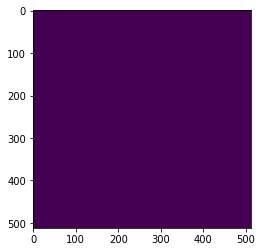

In [ ]:
plt.imshow(aa[0])

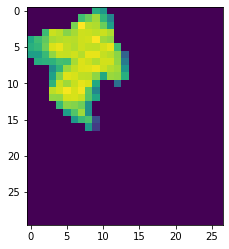

In [ ]:
plt.imshow(img_crop[4])

In [ ]:
img_crop.shape[0]

17

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
img = data['mask']
# cv2_imshow(img[100,:,:])= 
img_crop = crop_exact_tumor(data,mode = 0)
# print(img_crop.shape)
# cv2_imshow(img_crop[10,:,:])
cv2_imshow(img[100,:,:])

##ALbu Augmentaion 

In [ ]:
!pip install pillow


In [ ]:
from PIL import Image
import numpy as np
import cv2
import albumentations as A
from google.colab.patches import cv2_imshow

In [ ]:
#Setup all operations 
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [ ]:
img=cv2.imread("/content/image.jpg")

In [ ]:
transform_img=transform(image=img)

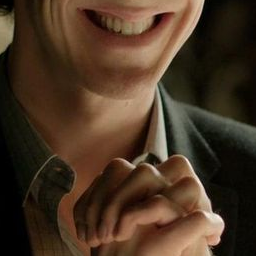

In [ ]:
cv2_imshow(transform_img['image'])


In [ ]:
cv2.imwrite("image1.jpg",transform_img['image'])

True

In [ ]:
def augmentation(img,filename):
  img=cv2.imread(filename)
  transform_img=transform(image=img)
  cv2.imwrite(filename,transform_img['image'])



## 1 DConv

In [ ]:
INIT_LR = 1e-3
EPOCHS = 25
BS = 8
num_classes=2
#Paths
dataset = ""
dataset_1 = ""
plot = ""
model = ""

In [ ]:
args={}
args["dataset"]=dataset
args["plot"]=plot
args["model"]=model
args["dataset_1"] = dataset_1

In [ ]:
#batch_size = 16
img_h,img_w = 64,64
num_channels = 3

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=2):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(3, 256, kernel_size=1, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=1, stride=1))
        self.layer2 = nn.Sequential(
            nn.Conv1d(3, 128, kernel_size=1, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=1, stride=1))
        self.layer3 = nn.Sequential(
            nn.Conv1d(3, 64, kernel_size=1, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=1, stride=1))
        self.layer4 = nn.Sequential(
            nn.Conv1d(3, 32, kernel_size=1, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=1, stride=1),
            nn.Flatten())
        
  
        self.fc1 = nn.Linear(1760, 256)
        self.fc2 = nn.Linear(256,2)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.fc1(out)
        out = self.fc2(out)
       
        return out

In [ ]:
model = ConvNet(num_classes).to(device,dtype=float)

In [ ]:
from torchsummary import summary  
summary(model, (3, 256, 256))


RuntimeError: ignored